
 n =  10 	 τ = 0.01	rmse = 0.164
 		 τ = 0.05	rmse = 0.246
 		 τ = 0.10	rmse = 0.363
 		 τ = 0.30	rmse = 0.786
 		 τ = 0.50	rmse = 0.743
 		 τ = 0.70	rmse = 0.869
 		 τ = 0.90	rmse = 1.113
 		 τ = 0.91	rmse = 1.741
 		 τ = 0.95	rmse = 1.233
 		 τ = 0.99	rmse = 1.114
 	
 n =  50 	 τ = 0.01	rmse = 0.033
 		 τ = 0.05	rmse = 0.087
 		 τ = 0.10	rmse = 0.181
 		 τ = 0.30	rmse = 0.607
 		 τ = 0.50	rmse = 0.465
 		 τ = 0.70	rmse = 0.658
 		 τ = 0.90	rmse = 1.150
 		 τ = 0.91	rmse = 1.139
 		 τ = 0.95	rmse = 1.085
 		 τ = 0.99	rmse = 0.904
 	
 n =  100 	 τ = 0.01	rmse = 0.016
 		 τ = 0.05	rmse = 0.054
 		 τ = 0.10	rmse = 0.129
 		 τ = 0.30	rmse = 0.492
 		 τ = 0.50	rmse = 0.365
 		 τ = 0.70	rmse = 0.501
 		 τ = 0.90	rmse = 1.175
 		 τ = 0.91	rmse = 1.109
 		 τ = 0.95	rmse = 0.900
 		 τ = 0.99	rmse = 0.674
 	
 n =  200 	 τ = 0.01	rmse = 0.011
 		 τ = 0.05	rmse = 0.038
 		 τ = 0.10	rmse = 0.097
 		 τ = 0.30	rmse = 0.389
 		 τ = 0.50	rmse = 0.251
 		 τ = 0.70	rmse = 0.354
 		 τ = 0.90	rmse = 1.10

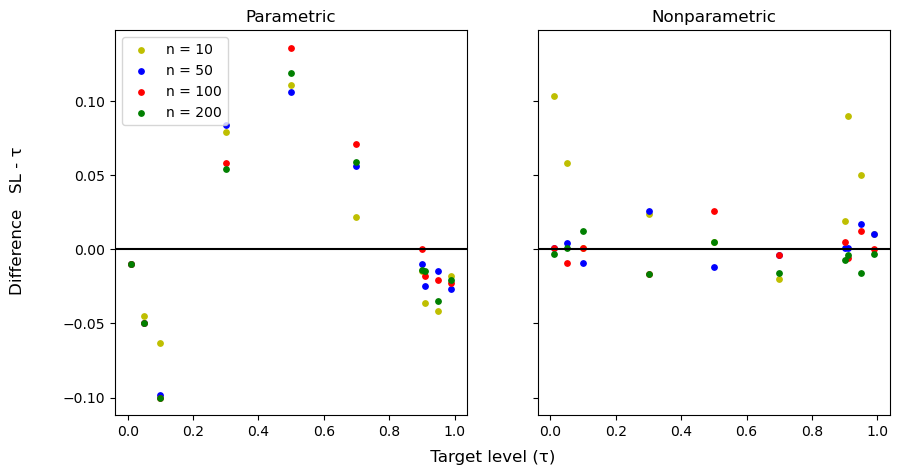

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import numpy.random as rng
import scipy.stats as sts

n = [10, 50, 100, 200]
tau = np.array([0.01, 0.05, 0.1,
                0.3, 0.5, 0.7, 0.9,
                0.91, 0.95, 0.99])
M = 1000
theta = 88
alpha = 1.25
rmse_array = [0, 0, 0, 0]
p_ls_array = [0, 0, 0, 0]
np_ls_array = [0, 0, 0, 0]

def calculate_performance(M, n, theta, alpha, tau):
    qstar = sts.gamma.ppf(tau, alpha,loc=0,scale= theta)
    rmse_np_values = []
    rmse_p_values = []

    ls_np_values = []
    ls_p_values = []

    for _ in range(M):
        data = rng.gamma(alpha, scale=theta, size=n)
        yn = data[n-1]

        # parametric
        sample_mean = np.mean(data)
        sample_variance_unadj = np.var(data)
        qparam = norm.ppf(tau, sample_mean, np.sqrt(sample_variance_unadj))

        rmse_p_values.append(qparam - qstar)

        if qparam >= yn:
            ls_p_values.append(1)

        # non parametric
        qnonparam = get_order_statistic(data, int(np.ceil(tau * n)) - 1) # to improve

        rmse_np_values.append(qnonparam - qstar)

        if qnonparam >= yn:
            ls_np_values.append(1)

    rmse_np = np.sqrt(np.sum(np.square(rmse_np_values)) / M)
    rmse_p = np.sqrt(np.sum(np.square(rmse_p_values)) / M)
    rmse_ratio = rmse_np / rmse_p

    ls_p = np.sum(ls_p_values) / M
    ls_np = np.sum(ls_np_values) / M
    return ls_p, ls_np, rmse_ratio
#def calculate_rmse(qparam, qstar):


def get_order_statistic(data, order):
    return np.partition(np.asarray(data), order)[order]

for i in range(len(n)):
    p_subarray = []
    np_subarray = []
    rmse_subarray = []
    print("\n n = ", n[i], end = " ")


    for j in tau:
        print("\t \u03C4 = %.2f" %j, end = "\t")
        performance = calculate_performance(M, n[i], theta, alpha, j)
        rmse_subarray.append(performance[2])
        print("rmse = %.3f"%performance[2], end = "\n \t")
        p_subarray.append(performance[0])
        np_subarray.append(performance[1])
    rmse_array[i] = rmse_subarray
    p_ls_array[i] = p_subarray
    np_ls_array[i] = np_subarray

    p_diff0 = [abs(p_ls_array[0] - tau)]
p_diff1 = [abs(p_ls_array[1] - tau)]
p_diff2 = [abs(p_ls_array[2] - tau)]
p_diff3 = [abs(p_ls_array[3] - tau)]
np_diff0 = [abs(np_ls_array[0] - tau)]
np_diff1 = [abs(np_ls_array[1] - tau)]
np_diff2 = [abs(np_ls_array[2]- tau)]
np_diff3 = [abs(np_ls_array[3] - tau)]

print(" \t parametric \t nonparametric")
print("\n n = 10   %.4f \t %.4f"%(np.mean(p_diff0), np.mean(np_diff0)))
print("\n n = 50   %.4f \t %.4f"%(np.mean(p_diff1), np.mean(np_diff1)))
print("\n n = 100  %.4f \t %.4f"%(np.mean(p_diff2), np.mean(np_diff2)))
print("\n n = 200  %.4f \t %.4f"%(np.mean(p_diff3), np.mean(np_diff3)))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(tau, p_ls_array[0]-tau, s=15, color = 'y', label='n = 10')
ax1.scatter(tau, p_ls_array[1]-tau, s=15, color ='b', label='n = 50')
ax1.scatter(tau, p_ls_array[2]-tau, s=15, color ='r', label='n = 100')
ax1.scatter(tau, p_ls_array[3]-tau, s=15, color = 'g', label='n = 200')
ax1.set_title("Parametric")
ax1.axhline(y=0, color = 'k')
ax2.scatter(tau, np_ls_array[0]-tau, s=15, color = 'y', label='n = 10')
ax2.scatter(tau, np_ls_array[1]-tau, s=15, color ='b', label='n = 50')
ax2.scatter(tau, np_ls_array[2]-tau, s=15, color ='r', label='n = 100')
ax2.scatter(tau, np_ls_array[3]-tau, s=15, color = 'g', label='n = 200')
ax2.set_title("Nonparametric")
ax2.axhline(y=0, color = 'k')

ax1.legend(loc='upper left')

fig.supylabel('Difference   SL - \u03C4')
fig.supxlabel("\n Target level (\u03C4)")

fig.set_size_inches(10, 5)
fig.savefig('Diff_SL.png', dpi=100)
plt.show()